# K MEANS CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('datasets/customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape


(200, 5)

In [6]:
#checking for the missing data
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#checking for the duplicate rows
df.duplicated().sum()

0

In [8]:
#converting the categorical into numeric

In [9]:
df_new = pd.get_dummies(df['Gender'])

In [10]:
df_new.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


In [11]:
df.drop(['Gender','CustomerID'],inplace = True,axis=1)

In [12]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [13]:
df1 = pd.concat((df_new,df),axis=1)

In [14]:
from sklearn.decomposition import PCA

In [16]:
pca =PCA(n_components=2)

In [17]:
pca_x = pca.fit_transform(df1.values)

In [18]:
#using the elbow method to find the optimal number of clusters
wcss=[]
for i in range(1,11):
    knn =KMeans(n_clusters=i)
    knn.fit(pca_x)
    wcss.append(knn.inertia_)

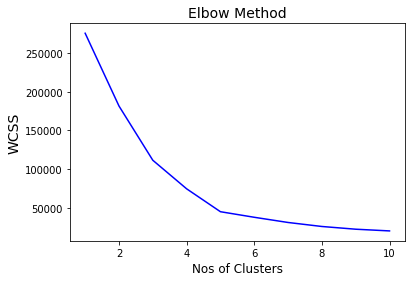

In [19]:
plt.plot(range(1,11),wcss,c='blue')
plt.title("Elbow Method",size=14)
plt.xlabel("Nos of Clusters",size=12)
plt.ylabel("WCSS",size=14)
plt.show()

In [20]:
# taking number of clusters = 5

In [21]:
kmeans =KMeans(n_clusters =5 ,random_state=1)

In [22]:
# fit and predict
y_pred = kmeans.fit_predict(pca_x)

In [23]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

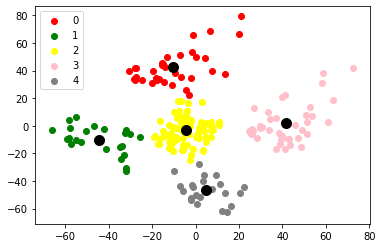

In [24]:
for i,color in zip(np.unique(y_pred),['red','green','yellow','pink','gray']):
    plt.scatter(pca_x[y_pred==i,0],pca_x[y_pred==i,1],c=color,label=i)
plt.legend()
centers =kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=100)
plt.show()

In [25]:
df1.columns

Index(['Female', 'Male', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [27]:
test_sample =np.array([[1,1,40,32,10]])

In [28]:
t1 = pca.transform(test_sample)

In [29]:
new_customer = kmeans.predict(t1)

In [31]:
print(new_customer[0])

1


In [32]:
# it is belonging to 1st segment